**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_chipseq/fcc_astarr_macs_input_overlap/summary"
txt_fname = "region.coverage.encode_chipseq_histone.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_coverage_chipseq_histone = dat
print(dim(dat))
head(dat)

[1] 2850798      12


Region,Size,Covered,Sum,Mean0,Mean,Min,Max,Annotation_A,Annotation_B,Target,Index_File
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1:10038-10405,367,367,157.198,0.428333,0.428333,0,1.08399,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:14282-14614,332,332,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:16025-16338,313,313,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:17288-17689,401,401,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:28934-29499,565,565,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:115429-115969,540,540,392.975,0.727731,0.727731,0,2.71006,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP


In [3]:
dat = dat_coverage_chipseq_histone
dat = dat %>% 
    dplyr::group_by(Region, Target) %>% 
    dplyr::summarise(Score = mean(Mean0), .groups = 'drop')

dat_coverage_summary = dat
print(dim(dat))
head(dat)

[1] 1800504       3


Region,Target,Score
<chr>,<chr>,<dbl>
chr10:100009244-100010395,H2AFZ,9.2276100
chr10:100009244-100010395,H3K27ac,2.2696800
chr10:100009244-100010395,H3K27me3,0.4426130
chr10:100009244-100010395,H3K36me3,0.3754215
chr10:100009244-100010395,H3K4me1,3.2244620
chr10:100009244-100010395,H3K4me2,19.9214000


In [4]:
dat = dat_coverage_summary
any(is.na(dat$Score))

[1] FALSE

In [5]:
dat = dat_coverage_summary
dat = dat %>% tidyr::spread(Target, Score)

mat_coverage_summary = dat
print(dim(dat))
head(dat)

[1] 150042     13


Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.9084870,1.30093,0.2900415,1.262835,1.849360,0.604243,0.5071693,0.249377,1.040661,0.773100,0.710016,0.701975
chr1:100036895-100039189,6.4620600,14.03340,0.3279065,1.293915,1.099260,29.863100,44.9492000,17.092200,24.336950,0.922788,1.073280,1.047220
chr1:100046252-100046533,0.0301893,1.13101,0.3555290,0.452645,3.434910,1.365020,1.1878148,10.955000,1.145038,2.110780,0.393331,2.246230
chr1:100048290-100048918,0.4234280,1.79969,0.5050575,1.268055,2.965920,1.660700,0.9599802,10.445900,1.344954,2.519360,0.659722,4.496470
chr1:100050225-100050529,0.8108740,2.30582,0.1711036,2.812605,2.793945,2.726880,1.0107967,7.257700,1.529890,1.462830,0.749994,2.196770
chr1:100064757-100065161,0.3412110,1.36302,0.3218830,1.954740,2.016580,0.471048,0.6323928,1.348410,1.677045,1.043280,0.727391,0.971441


In [6]:
any(is.na(mat_coverage_summary))

[1] FALSE

In [7]:
library(pheatmap)

In [8]:
dat = mat_coverage_summary
dat = dat %>% column_to_rownames(var = "Region")
head(dat)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.9084870,1.30093,0.2900415,1.262835,1.849360,0.604243,0.5071693,0.249377,1.040661,0.773100,0.710016,0.701975
chr1:100036895-100039189,6.4620600,14.03340,0.3279065,1.293915,1.099260,29.863100,44.9492000,17.092200,24.336950,0.922788,1.073280,1.047220
chr1:100046252-100046533,0.0301893,1.13101,0.3555290,0.452645,3.434910,1.365020,1.1878148,10.955000,1.145038,2.110780,0.393331,2.246230
chr1:100048290-100048918,0.4234280,1.79969,0.5050575,1.268055,2.965920,1.660700,0.9599802,10.445900,1.344954,2.519360,0.659722,4.496470
chr1:100050225-100050529,0.8108740,2.30582,0.1711036,2.812605,2.793945,2.726880,1.0107967,7.257700,1.529890,1.462830,0.749994,2.196770
chr1:100064757-100065161,0.3412110,1.36302,0.3218830,1.954740,2.016580,0.471048,0.6323928,1.348410,1.677045,1.043280,0.727391,0.971441


In [9]:
set.seed(123)
idx = sample(1:nrow(dat), size = 10000)
print(length(idx))

[1] 10000


In [10]:
tmp = dat[idx,]
dim(tmp)

[1] 10000    12

In [11]:
vec = brewer.pal(n = 7, name = "Reds")
vec = c("#FFFFFF", vec)

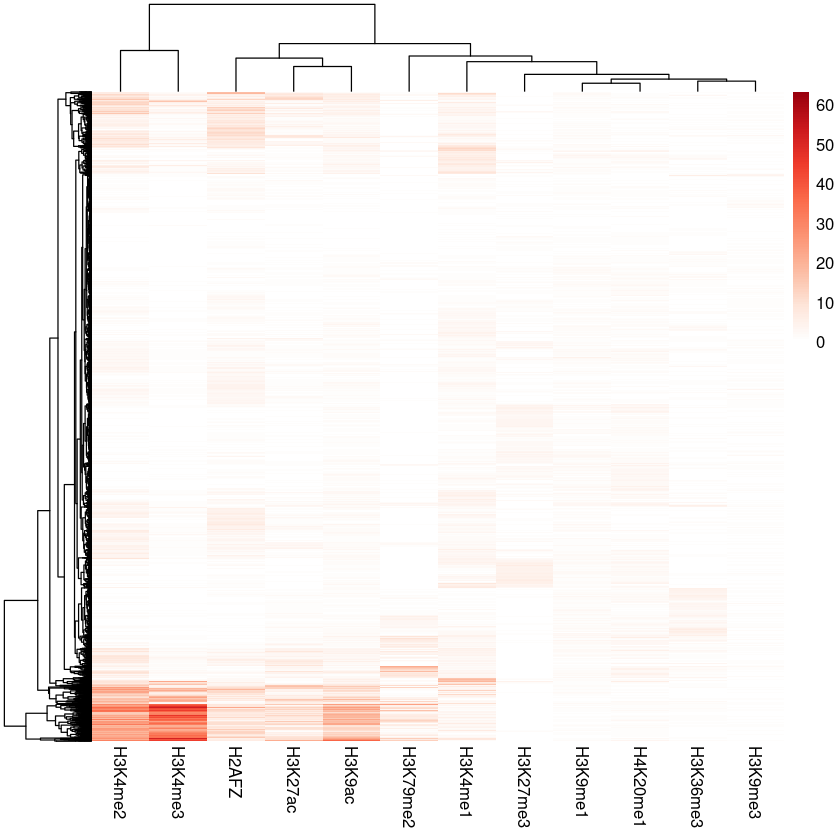

In [12]:
pheatmap(
    tmp, 
    color = colorRampPalette(vec)(100),
    show_rownames = FALSE)

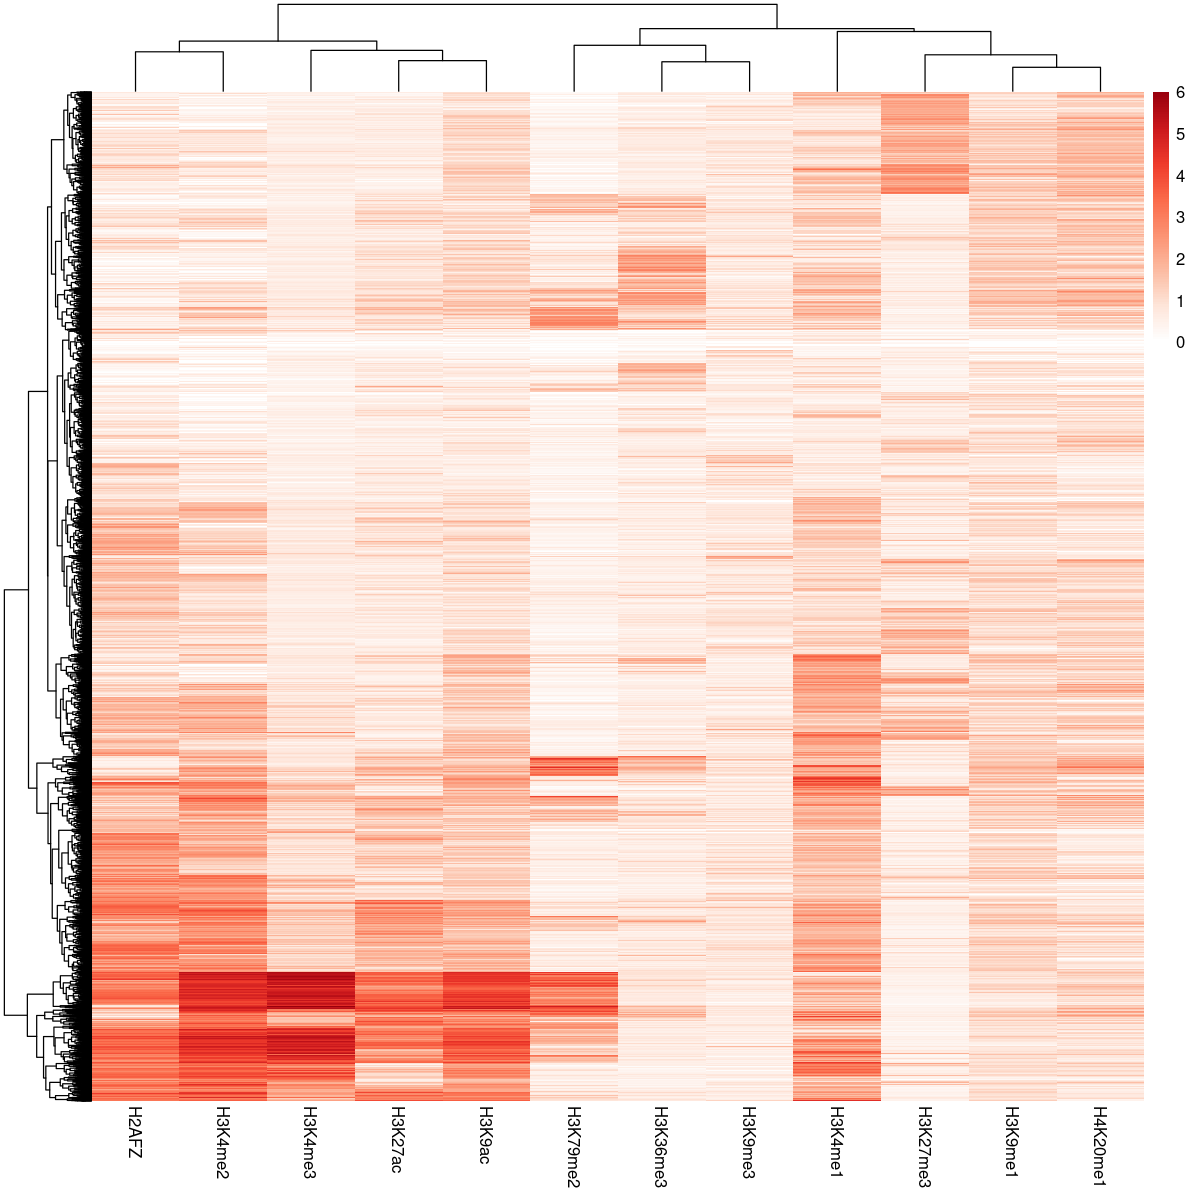

In [22]:
options(repr.plot.height=10, repr.plot.width=10)
pheatmap(
    log2(tmp), 
    color = colorRampPalette(vec)(100),
    show_rownames = FALSE)

Warning message:
“Removed 18444 rows containing non-finite outside the scale range
(`stat_density()`).”


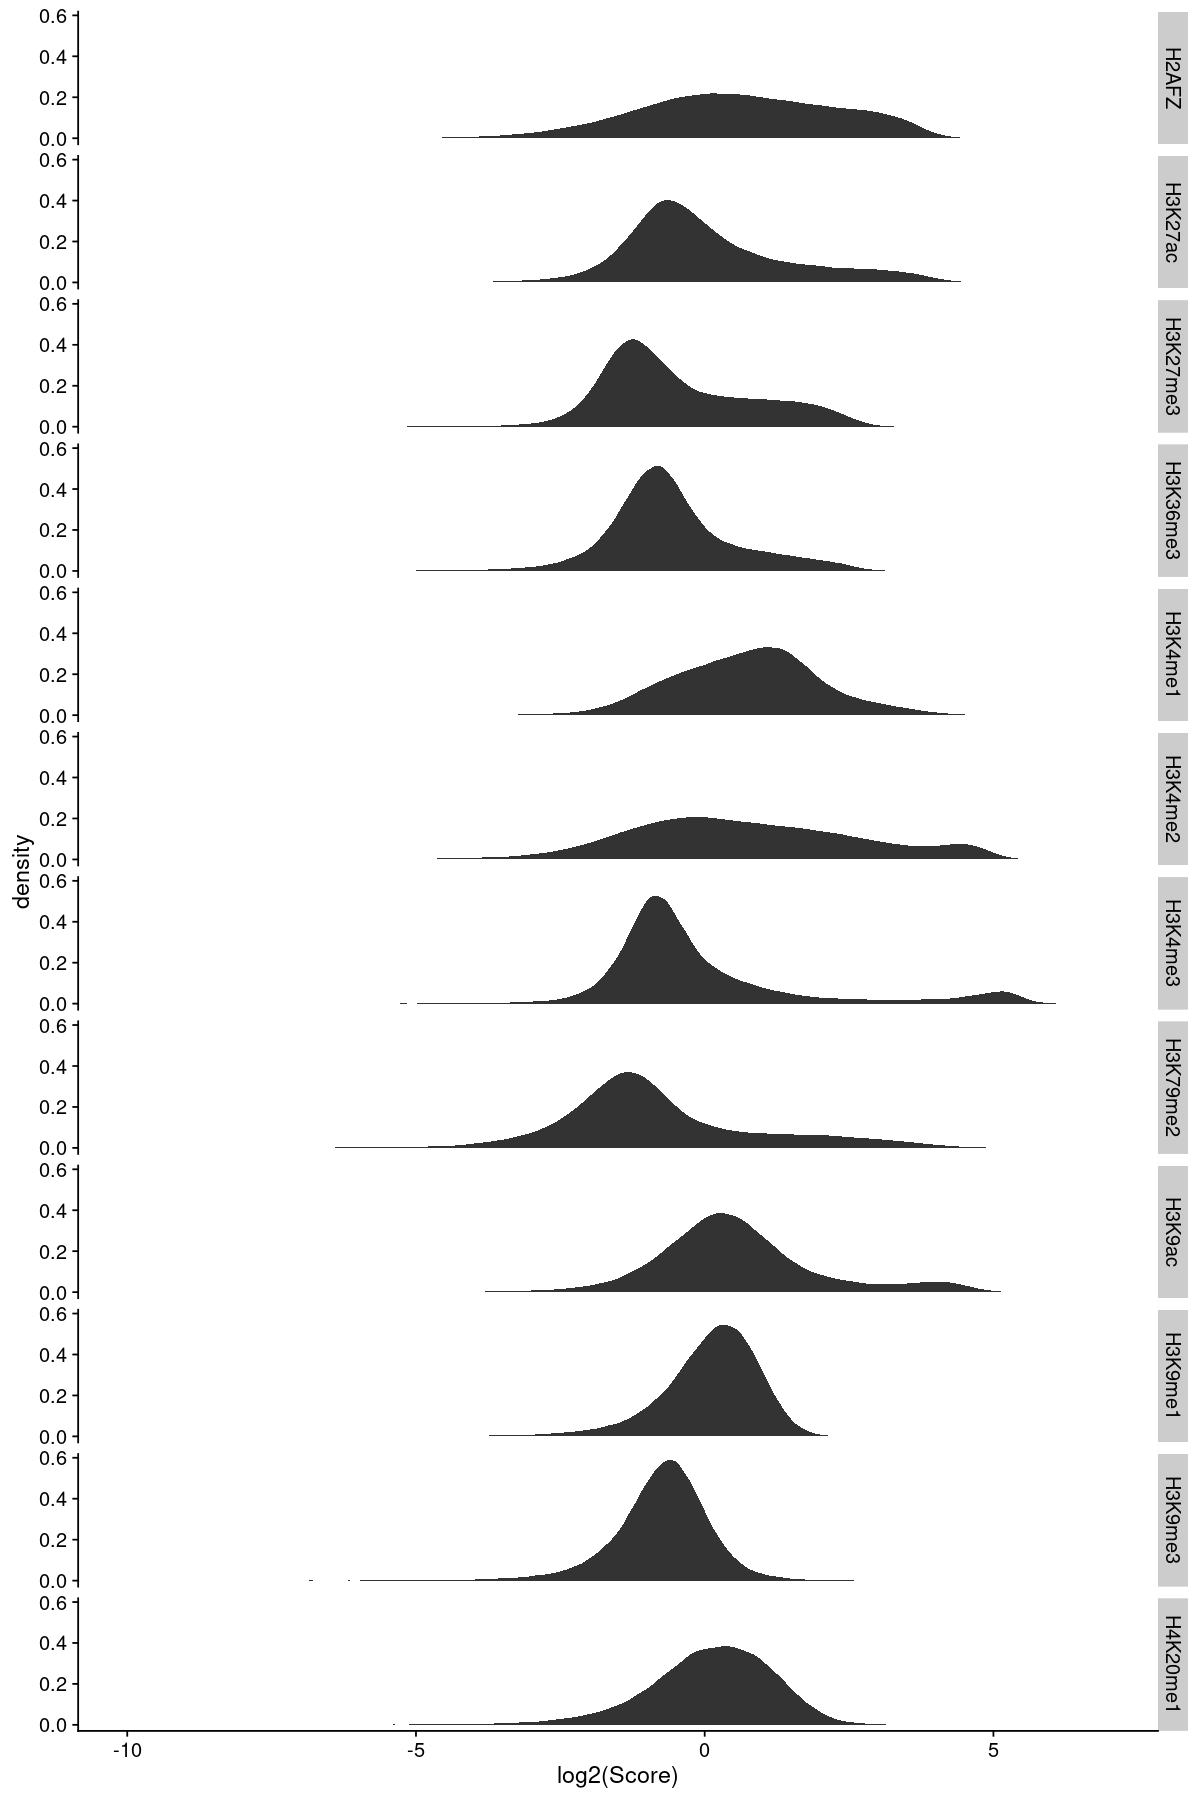

In [20]:
dat = dat_coverage_summary 
gpt = ggplot(dat, aes(x=log2(Score))) +
    stat_density() +
    xlim(-10, 7)+
    theme_cowplot() +
    facet_grid(Target~.)
options(repr.plot.height=15, repr.plot.width=10)
print(gpt)

In [37]:
dat = dat_coverage_summary
dat = dat %>% dplyr::filter(Score != 0) %>% dplyr::mutate(Score = log2(Score))
dat = dat %>% tidyr::spread(Target, Score)
dat = dat %>% column_to_rownames(var = "Region")

mat_coverage_summary = dat
print(dim(dat))
head(dat)

[1] 150008     12


,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,-0.1384622,0.3795433,-1.7856688,0.3366662,0.8870261,-0.7267992,-0.97946082,-2.0035997,0.05750018,-0.37127306,-0.4940766,-0.51050844
chr1:100036895-100039189,2.6919941,3.8107927,-1.6086436,0.3717428,0.1365333,4.9002920,5.49022353,4.0952662,4.60507647,-0.11592885,0.1020265,0.06656456
chr1:100046252-100046533,-5.0498189,0.1776117,-1.4919609,-1.1435481,1.7802723,0.4489221,0.24830985,3.4535176,0.19539548,1.07777622,-1.3461842,1.16750566
chr1:100048290-100048918,-1.2398114,0.8477484,-0.9854804,0.3426173,1.5684797,0.7317915,-0.05892337,3.3848649,0.42755683,1.33305729,-0.6000699,2.16879284
chr1:100050225-100050529,-0.3024503,1.2052799,-2.5470578,1.4919070,1.4823036,1.4472512,0.01549293,2.8595124,0.61342793,0.54876212,-0.4150490,1.13538383
chr1:100064757-100065161,-1.5512639,0.4468067,-1.6353917,0.9669767,1.0119106,-1.0860540,-0.66110727,0.4312592,0.74592097,0.06112641,-0.4591970,-0.04180172


In [38]:
any(is.na(mat_coverage_summary))

[1] TRUE

In [39]:
dat = mat_coverage_summary
dat = dat %>% na.omit()
any(is.na(dat))

[1] FALSE

In [40]:
set.seed(123)
dat = mat_coverage_summary
dat = dat %>% na.omit()

idx = sample(1:nrow(dat), size = 10000)
tmp = dat[idx,]
print(length(idx))
print(dim(tmp))

[1] 10000
[1] 10000    12


In [47]:
vec = brewer.pal(n = 7, name = "RdBu")
vec = rev(vec)

In [48]:
paletteLength = 50
myColor = colorRampPalette(vec)(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
myBreaks <- c(seq(min(tmp), 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(max(tmp)/paletteLength, max(tmp), length.out=floor(paletteLength/2)))

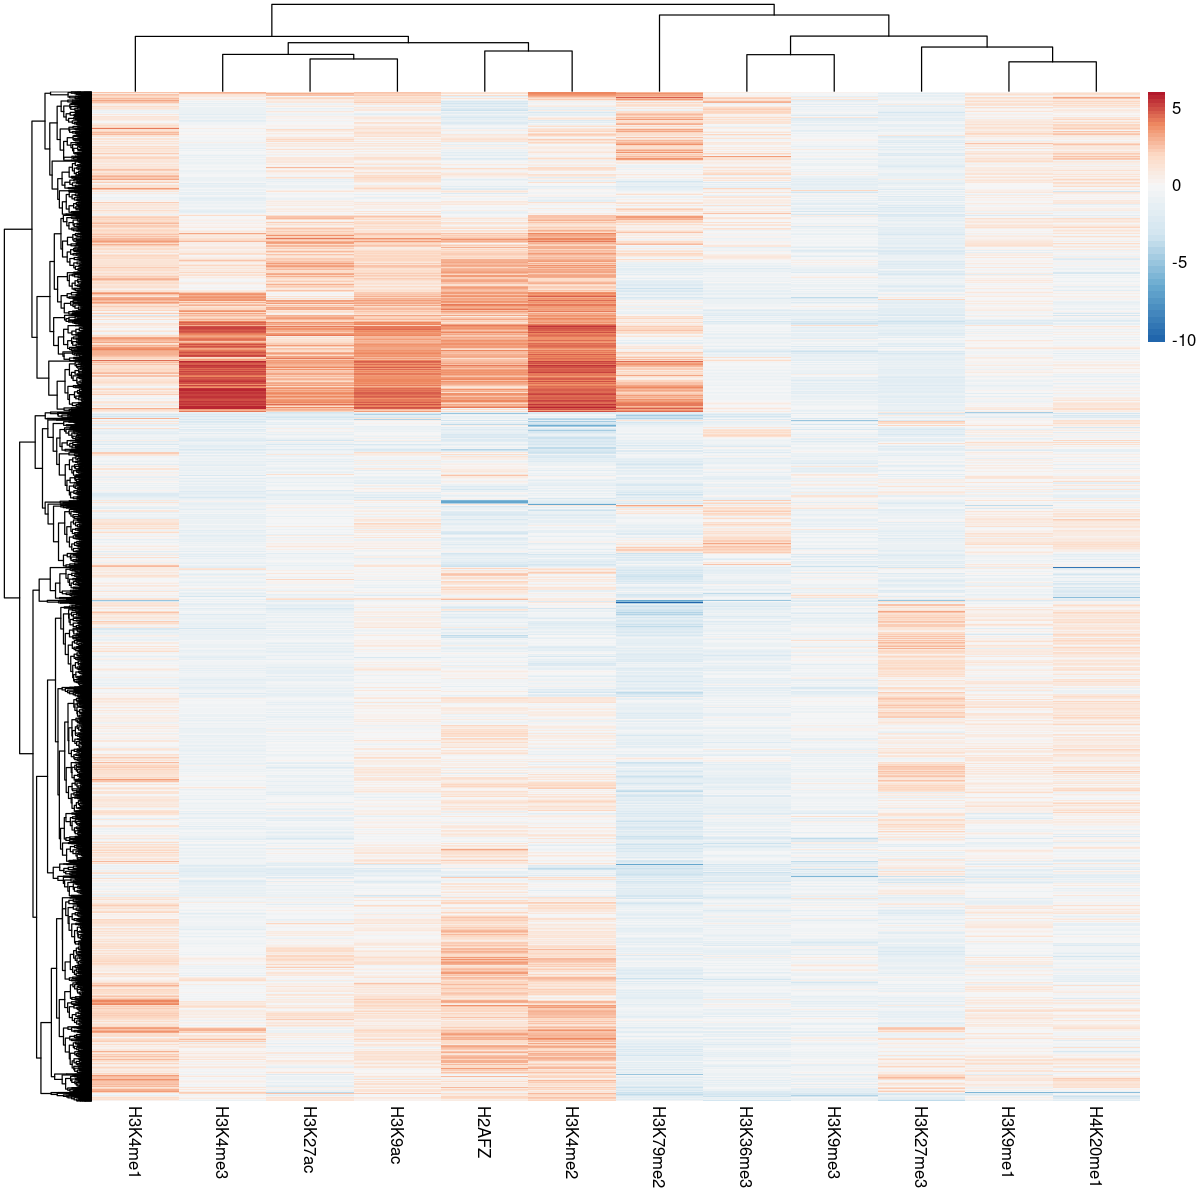

In [49]:
pheatmap(
    tmp, 
    color=myColor, breaks=myBreaks,
    show_rownames = FALSE)

In [ ]:
dat = dat_coverage_summary
dat = dat %>% tidyr::spread(Target, Score)

mat_coverage_summary = dat
print(dim(dat))
head(dat)

In [8]:
dat = mat_coverage_summary
dat = dat %>% column_to_rownames(var = "Region")
head(dat)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.5440270,1.547830,0.034976800,0.7343255,1.618630,0.421442,0.2467395,0.0621427,0.5230985,0.229260,0.301103,0.267525
chr1:100036895-100039189,11.8517000,118.523000,0.045839000,1.1265035,0.818885,63.283200,192.0023750,74.0817000,87.7667000,0.326536,0.686410,0.522124
chr1:100046252-100046533,0.0520506,0.769209,0.035720165,0.1937501,4.162750,0.758239,0.5511430,25.7854000,0.7853099,1.266150,0.112500,1.349110
chr1:100048290-100048918,0.1297520,2.315990,0.236703100,0.7268745,4.381910,0.728546,0.4523622,26.2643000,0.7424300,1.480710,0.261518,4.739960
chr1:100050225-100050529,0.2726720,4.912780,0.004278435,4.0054800,5.371100,2.067760,0.6200202,22.3808000,1.0369080,0.633395,0.267164,1.828230
chr1:100064757-100065161,0.0940149,0.863932,0.033456395,1.8845535,1.206043,0.295002,0.2319361,0.7202330,1.6244865,0.310127,0.214077,0.360903


In [16]:
set.seed(123)
idx = sample(1:nrow(dat), size = 10000)
print(length(idx))

[1] 10000


In [17]:
tmp = dat[idx,]
dim(tmp)

[1] 10000    12

In [18]:
vec = brewer.pal(n = 7, name = "Reds")
vec = c("#FFFFFF", vec)

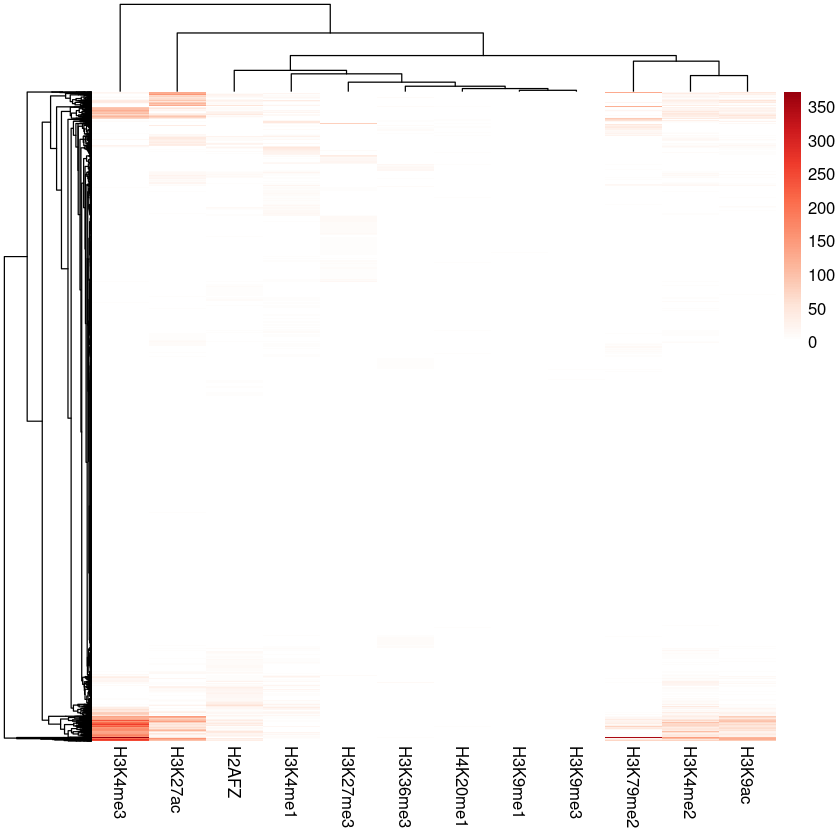

In [19]:
pheatmap(
    tmp, 
    color = colorRampPalette(vec)(100),
    show_rownames = FALSE)